In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.set_visible_devices(physical_devices[0], 'GPU')

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15611907284437661450
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1745302324
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12624242081072385961
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import plot_model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

%matplotlib inline

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(
    label_mode='fine'
)

In [5]:
x_train.shape

(50000, 32, 32, 3)

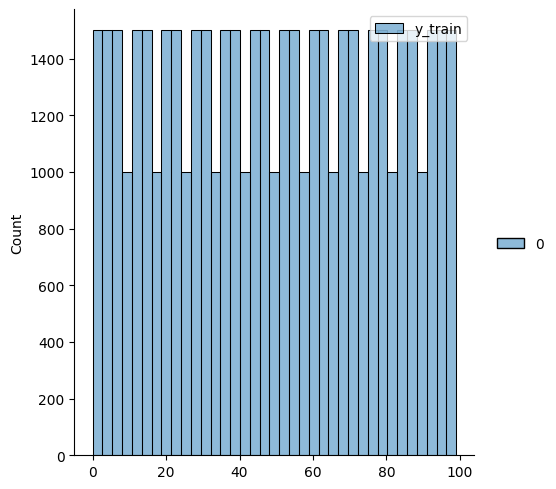

In [6]:
sns.displot(y_train, label='y_train')
plt.legend() 

In [7]:
unique_labels = np.unique(y_train)
unique_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

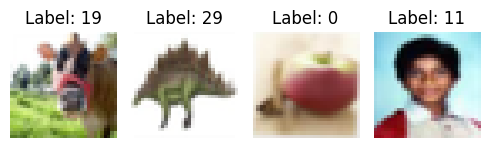

In [8]:
# Plotting 4 images in a row
plt.figure(figsize=(5, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(x_train[i])  # Display the image
    plt.title(f"Label: {y_train[i][0]}")  # Show the label
    plt.axis('off')  # Hide the axes
plt.tight_layout()
plt.show()

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [10]:
x_train.shape

(40000, 32, 32, 3)

In [11]:
X_train = x_train.astype('float32') / 255.0
X_val = x_val.astype('float32') / 255.0
X_test = x_test.astype('float32') / 255.0

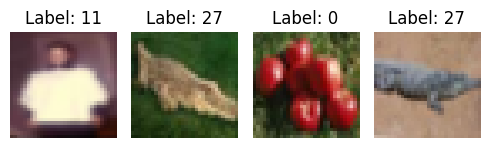

In [12]:
# Plotting 4 images in a row
plt.figure(figsize=(5, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(x_train[i])  # Display the image
    plt.title(f"Label: {y_train[i][0]}")  # Show the label
    plt.axis('off')  # Hide the axes
plt.tight_layout()
plt.show()

In [13]:
model = Sequential([
    Conv2D(256, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(),

    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(1024, (3, 3), activation='relu'),
    MaxPooling2D(),

    Flatten(),

    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),

    Dense(100, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 512)       1180160   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 512)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 1024)        4719616   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 1024)       0

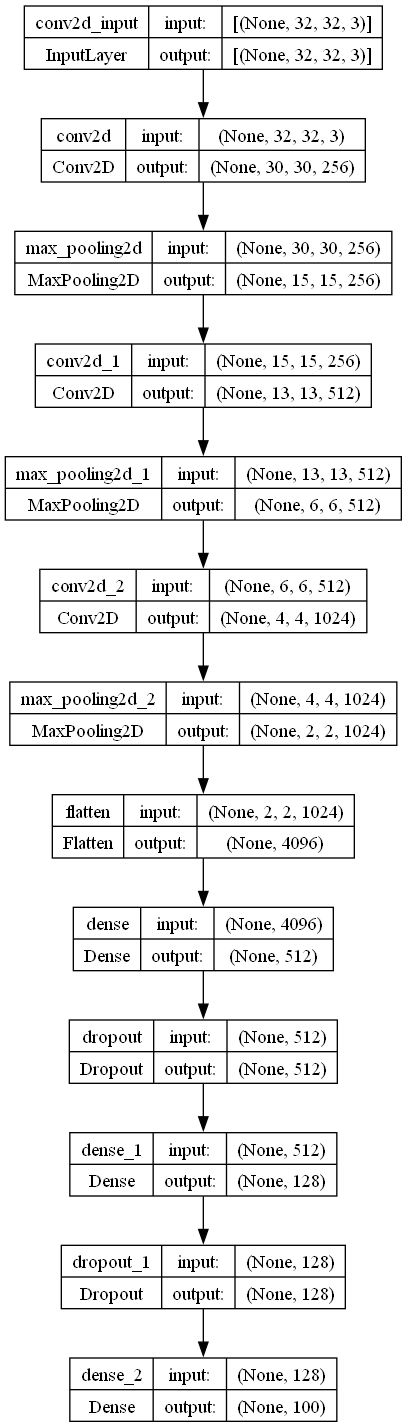

In [15]:
plot_model(model, show_shapes=True)

In [16]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
1250/1250 [==============================] - 33s 23ms/step - loss: 5.4615 - accuracy: 0.0152 - val_loss: 5.1523 - val_accuracy: 0.0347
Epoch 2/20
1250/1250 [==============================] - 28s 23ms/step - loss: 5.0712 - accuracy: 0.0267 - val_loss: 4.8792 - val_accuracy: 0.0545
Epoch 3/20
1250/1250 [==============================] - 28s 23ms/step - loss: 4.7640 - accuracy: 0.0483 - val_loss: 4.4416 - val_accuracy: 0.0951
Epoch 4/20
1250/1250 [==============================] - 28s 23ms/step - loss: 4.4354 - accuracy: 0.0771 - val_loss: 4.0941 - val_accuracy: 0.1348
Epoch 5/20
1250/1250 [==============================] - 29s 23ms/step - loss: 4.1207 - accuracy: 0.1163 - val_loss: 3.6911 - val_accuracy: 0.1940
Epoch 6/20
1250/1250 [==============================] - 29s 23ms/step - loss: 3.8202 - accuracy: 0.1572 - val_loss: 3.4113 - val_accuracy: 0.2406
Epoch 7/20
1250/1250 [==============================] - 29s 23ms/step - loss: 3.5335 - accuracy: 0.2060 - val_loss: 3.2098 -

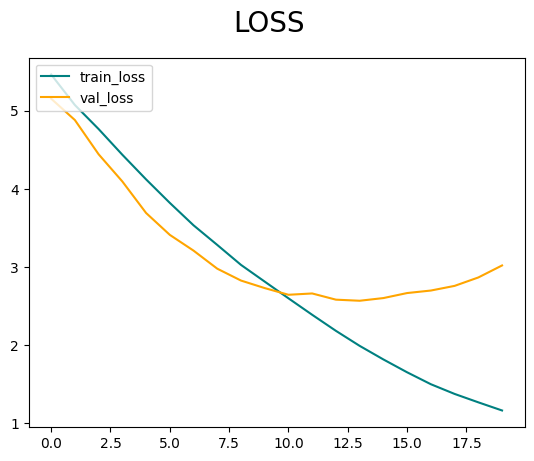

In [18]:
fig = plt.figure()
plt.plot(history.history["loss"], color='teal', label='train_loss')
plt.plot(history.history["val_loss"], color='orange', label='val_loss')
plt.suptitle('LOSS',fontsize=20)
plt.legend(loc="upper left")
plt.show()

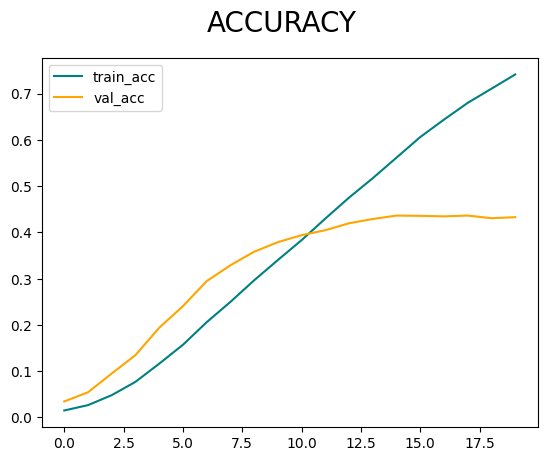

In [19]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color='teal', label='train_acc')
plt.plot(history.history['val_accuracy'],color='orange', label='val_acc')
plt.suptitle('ACCURACY',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [20]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss}")

313/313 [==============================] - 2s 7ms/step - loss: 2.9831 - accuracy: 0.4322
Test Accuracy: 43.22%
Test Loss: 2.9831340312957764


313/313 [==============================] - 2s 6ms/step


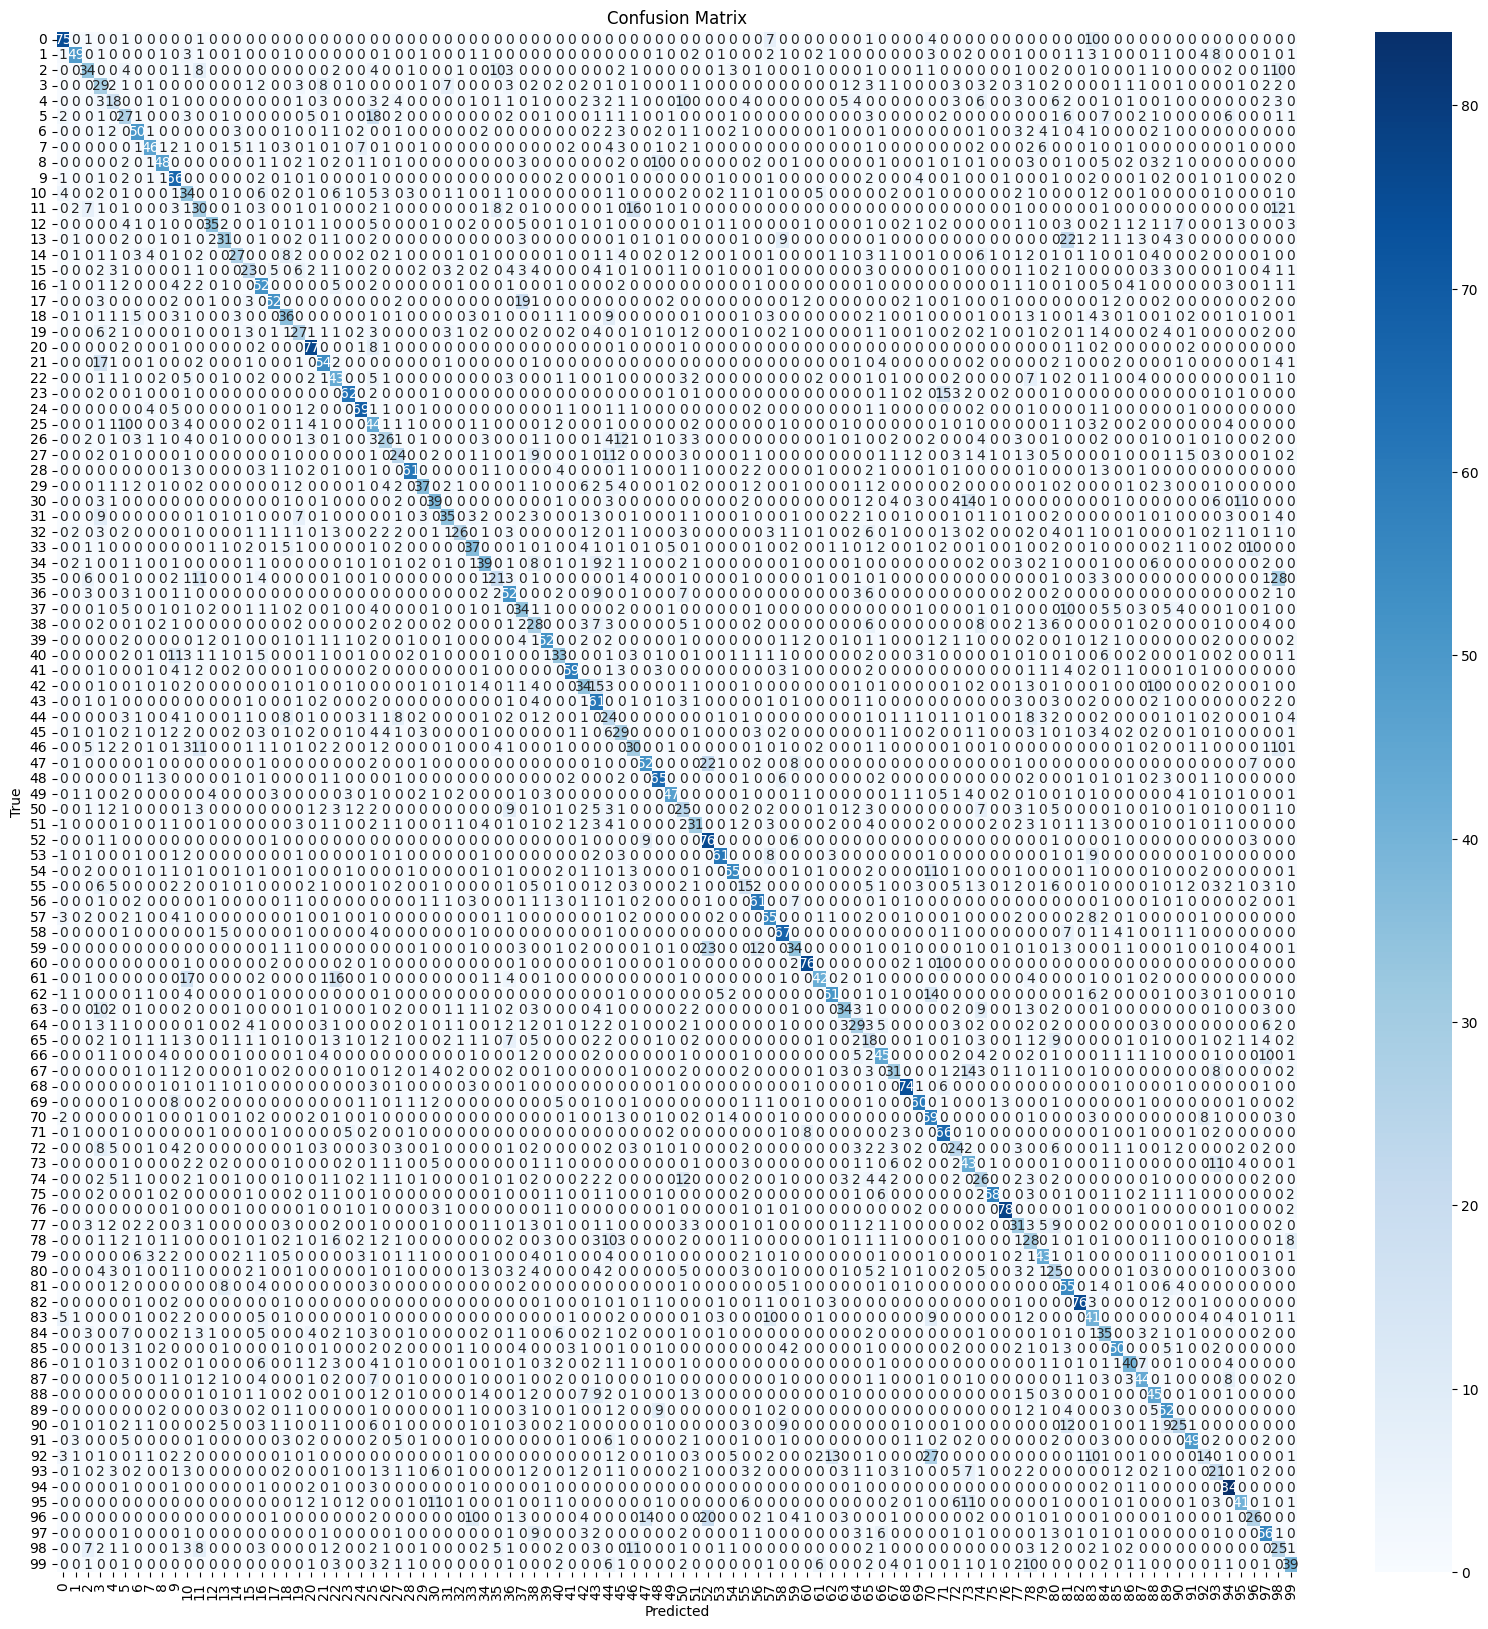

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have predictions for x_test stored in y_pred
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted classes

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Define class labels (if available)
class_labels = unique_labels

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [22]:
model.save('model.h5')